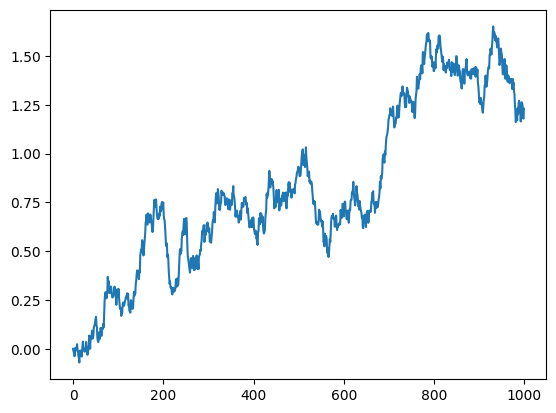

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def wiener_process(n_steps, time_unit=1):
    w = np.zeros(n_steps * time_unit)
    delta_t = time_unit / n_steps

    for i in range(1, n_steps * time_unit):
        delta_w = np.random.normal(0, np.sqrt(delta_t)) #Numpy random takes in standard deviation, not variance.
        w[i] = w[i-1] + delta_w
    
    return w

plt.plot(wiener_process(1000))
plt.show()

$W(t)$ is a Wiener process where:

- $W(0) = 0$

- $W(t) \sim \mathcal{N}(0, t)$

- $W(t) - W(s) \sim \mathcal{N}(0, t-s)$ for $0 \leq s < t $ i.e., an earlier time

There is zero drift, therefore expected value stays at 0. 

- $E[W(t)] = 0$

In a Wiener process, the variance grows proportionally with time.

- $Var(W(t)) \propto t$


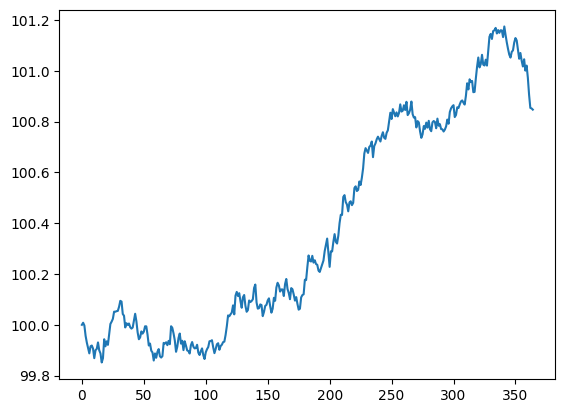

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def geometric_brownian_motion(S0, drift, volatility, n_steps, time_unit=1):
    # Wiener Process
    w = np.zeros(n_steps * time_unit)
    delta_t = time_unit / n_steps

    for i in range(1, n_steps * time_unit):
        delta_w = np.random.normal(0, np.sqrt(delta_t))
        w[i] = w[i-1] + delta_w
    # w is the output of the Wiener Process
    
    # Apply the Wiener Process to the Geometric Brownian Motion
    S = np.zeros(n_steps * time_unit)
    S[0] = S0
    
    delta_t = time_unit / n_steps
    for i in range(1, n_steps * time_unit):
        S[i] = S[i-1] * np.exp((drift - 0.5 * volatility**2) * delta_t + volatility * np.sqrt(delta_t) * (w[i] - w[i-1]))
    
    return S

start_price = 100
drift = 0.01 # 1% drift upwards
volatility = 0.1 # 0.1/10% standard deviation
n_steps = 365 # 365 days in a year
time_unit = 1 # 1 year

plt.plot(geometric_brownian_motion(start_price, drift, volatility, n_steps, time_unit))
plt.show()



Geometric Brownian Motion: $$ dS(t) = \mu S(t) dt + \sigma S(t) dW(t) $$
Where:
- $S(t)$ is the asset price at time t.
- $\mu$ is the drift term/expected return
- $\sigma$ is the volatility, representing the standard deviations of returns.
- $W(t)$ A Wiener process. Important to remember that while W(t) follows a normal distribution, as it is exponentiated, the output turns into a log-norm distribution.

In Discrete Form: $$ S_{i+1} = S_i \exp\left( \left( \mu - \frac{1}{2}\sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} \left(W_{i+1} - W_i\right) \right) $$
The $\frac{1}{2}$ correction comes from **Itô's Lemma**. If you apply Itô's Lemma to the logarithm of the asset price 
($ln(S(t))$), you get a correction term due to the stochastic part of the process ($dW(t)$ term). Itô's Lemma accounts for the fact that when you take the logarithm of a stochastic process, the variance contributes to the drift term.
